# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there are some cities with over 25 mph of wind.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls



In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#create a storage location
temp = []
humidity = []
cloudy = []
wind_speed = []
lat = []
lng = []
country = []
date = []
city_name = []
count = 0

for city in cities:
    response = requests.get(query_url + city).json()
    count += 1
    print(f'Processing Record {count} | For {city}')
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
    except KeyError:
          print('City not found. Skipping...')

Processing Record 1 | For nizhneyansk
City not found. Skipping...
Processing Record 2 | For hermanus
Processing Record 3 | For tinskoy
Processing Record 4 | For mataura
Processing Record 5 | For denpasar
Processing Record 6 | For pueblo
Processing Record 7 | For jamestown
Processing Record 8 | For carnarvon
Processing Record 9 | For barentsburg
City not found. Skipping...
Processing Record 10 | For lebu
Processing Record 11 | For cabo san lucas
Processing Record 12 | For saint-philippe
Processing Record 13 | For barrow
Processing Record 14 | For avarua
Processing Record 15 | For vaini
Processing Record 16 | For susangerd
Processing Record 17 | For rawson
Processing Record 18 | For biak
Processing Record 19 | For hobart
Processing Record 20 | For deder
Processing Record 21 | For jumla
Processing Record 22 | For kavaratti
Processing Record 23 | For padang
Processing Record 24 | For camopi
Processing Record 25 | For punta arenas
Processing Record 26 | For grand river south east
City not f

Processing Record 204 | For gwadar
Processing Record 205 | For krasnoselkup
City not found. Skipping...
Processing Record 206 | For darhan
Processing Record 207 | For eyl
Processing Record 208 | For nieuwpoort
Processing Record 209 | For arlit
Processing Record 210 | For linqiong
Processing Record 211 | For kabo
Processing Record 212 | For palmer
Processing Record 213 | For nova olimpia
Processing Record 214 | For qostanay
Processing Record 215 | For urdzhar
City not found. Skipping...
Processing Record 216 | For mount isa
Processing Record 217 | For nanortalik
Processing Record 218 | For corralillo
Processing Record 219 | For batagay-alyta
Processing Record 220 | For kieta
Processing Record 221 | For katsuura
Processing Record 222 | For alappuzha
City not found. Skipping...
Processing Record 223 | For sentyabrskiy
City not found. Skipping...
Processing Record 224 | For hay river
Processing Record 225 | For asyut
Processing Record 226 | For ouesso
Processing Record 227 | For farafangan

Processing Record 406 | For betare oya
Processing Record 407 | For deniliquin
Processing Record 408 | For nara
Processing Record 409 | For linqu
Processing Record 410 | For ahuimanu
Processing Record 411 | For codrington
Processing Record 412 | For fairbanks
Processing Record 413 | For tahe
Processing Record 414 | For lumut
Processing Record 415 | For mutsu
Processing Record 416 | For caravelas
Processing Record 417 | For road town
Processing Record 418 | For ostersund
Processing Record 419 | For norman wells
Processing Record 420 | For kalabo
Processing Record 421 | For bengkulu
City not found. Skipping...
Processing Record 422 | For haibowan
City not found. Skipping...
Processing Record 423 | For vredendal
Processing Record 424 | For hilton head island
Processing Record 425 | For ulagan
Processing Record 426 | For chalisgaon
Processing Record 427 | For mirabad
Processing Record 428 | For mulege
Processing Record 429 | For macusani
Processing Record 430 | For sao gabriel da cachoeira


Processing Record 613 | For coruripe
Processing Record 614 | For tomigusuku
Processing Record 615 | For artigas


### Convert Raw Data to DataFrame


In [4]:
weather_data  = pd.DataFrame({'City': city_name, 'Country': country, 'Date':date,
                              'Cloudiness (%)': cloudy, 'Humidity (%)': humidity, 'Lat': lat,
                             'Lng': lng, 'Max Temp (F)': temp, 'Wind Speed (mph)': wind_speed})
weather_data.to_csv(output_data_file)

In [5]:
weather_data.head()

,City,Country,Date,Cloudiness (%),Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Hermanus,ZA,1553901397,68,96,-34.42,19.24,64.99,2.62
1,Tinskoy,RU,1553902104,0,73,56.15,96.92,18.43,5.30
2,Mataura,NZ,1553901606,0,98,-46.19,168.86,59.00,4.63
3,Denpasar,ID,1553898600,20,94,-8.65,115.22,78.80,3.36
4,Pueblo,US,1553901884,90,70,38.25,-104.61,53.01,13.87


In [6]:
weather_data.dtypes

City                 object
Country              object
Date                  int64
Cloudiness (%)        int64
Humidity (%)          int64
Lat                 float64
Lng                 float64
Max Temp (F)        float64
Wind Speed (mph)    float64
dtype: object

#### Latitude vs. Temperature Plot

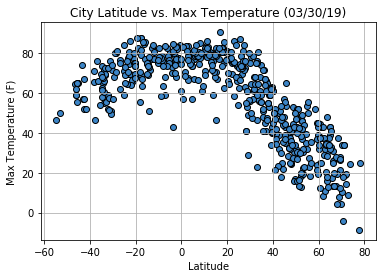

In [14]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Max Temperature (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/latitude_vs_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

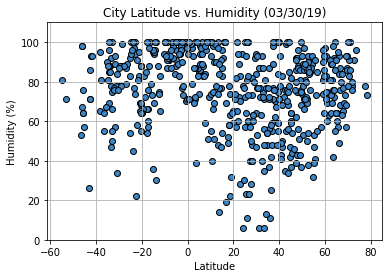

In [15]:
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Humidity (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100+10)
plt.grid()
plt.savefig('output_data/latitude_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

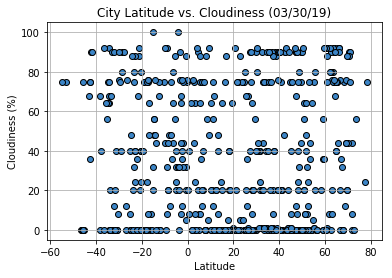

In [16]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/latitude_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

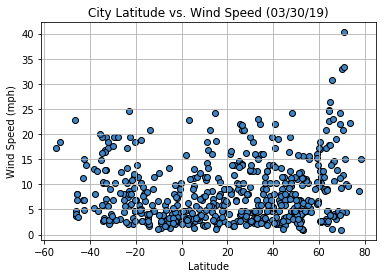

In [17]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/latitude_vs_windspeed.png')
plt.show()